In [0]:
from google.colab import files
uploaded = files.upload()

Saving games_tourney.csv to games_tourney.csv


In [0]:
games_season = pd.read_csv("games_season.csv")
games_season_enriched = pd.read_csv("games_season_enriched.csv")
games_tourney = pd.read_csv("games_tourney.csv")

In [0]:
games_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312178 entries, 0 to 312177
Data columns (total 8 columns):
season        312178 non-null int64
team_1        312178 non-null int64
team_2        312178 non-null int64
home          312178 non-null int64
score_diff    312178 non-null int64
score_1       312178 non-null int64
score_2       312178 non-null int64
won           312178 non-null int64
dtypes: int64(8)
memory usage: 19.1 MB


In [0]:
games_season_enriched.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
season        4234 non-null int64
team_1        4234 non-null int64
team_2        4234 non-null int64
home          4234 non-null int64
seed_diff     4234 non-null int64
score_diff    4234 non-null int64
score_1       4234 non-null int64
score_2       4234 non-null int64
won           4234 non-null int64
pred          4234 non-null float64
dtypes: float64(1), int64(9)
memory usage: 330.9 KB


In [0]:
games_tourney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 9 columns):
season        4234 non-null int64
team_1        4234 non-null int64
team_2        4234 non-null int64
home          4234 non-null int64
seed_diff     4234 non-null int64
score_diff    4234 non-null int64
score_1       4234 non-null int64
score_2       4234 non-null int64
won           4234 non-null int64
dtypes: int64(9)
memory usage: 297.8 KB


In [0]:
"""
Basics:
The first step in creating a neural network model is to define the Input layer. 
This layer takes in raw data, usually in the form of numpy arrays. 
The shape of the Input layer defines how many variables your neural network will use. 
For example, if the input data has 10 columns, you define an Input layer with a shape of (10,)

Remember that the input layer allows your model to load data
"""

In [0]:
# Import Input from keras.layers
from keras.layers import Input

# Create an input layer of shape 1
input_tensor = Input(shape=(1,))

Using TensorFlow backend.


In [0]:
"""

Once you have an Input layer, the next step is to add a Dense layer.
Dense layers learn a weight matrix, where the first dimension of the matrix is the dimension of the input data, 
and the second dimension is the dimension of the output data. 
Recall that your Input layer has a shape of 1. 
In this case, your output layer will also have a shape of 1. 
This means that the Dense layer will learn a 1x1 weight matrix.

This network will take the input, apply a linear coefficient to it, and return the result.


"""

In [0]:
# Load layers
from keras.layers import Input, Dense

# Input layer (from previous exercise)
input_tensor = Input(shape=(1,))

# Create a dense layer
output_layer = Dense(1)

# Connect the dense layer to the input_tensor
output_tensor = output_layer(input_tensor)

In [0]:
"""
Output layers are simply Dense layers! 
Output layers are used to reduce the dimension of the inputs to the dimension of the outputs.
For now, you'll always use a single output in your neural networks, which is equivalent to Dense(1) or a dense layer with a single unit.

The output layer allows your model to make predictions.

"""

In [0]:
# Load layers
from keras.layers import Input, Dense

# Input layer
input_tensor = Input(shape=(1,))

# Create a dense layer and connect the dense layer to the input_tensor in one step
# Note that you did this in 2 steps in the previous exercise, but are doing it in one step now
output_tensor = Dense(1)(input_tensor)

In [0]:
"""
Once you've defined an input layer and an output layer, you can build a Keras model. 
The model object is how you tell Keras where the model starts and stops: where data comes in and where predictions come out.

The below model is a complete neural network, ready to learn from data and make prediction.

"""

In [0]:
# Input/dense/output layers
from keras.layers import Input, Dense
input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)

# Build the model
from keras.models import Model
model = Model(input_tensor, output_tensor)

In [0]:
"""
The final step in creating a model is compiling it. 
Now that you've created a model, you have to compile it before you can fit it to data. 
This finalizes your model, freezes all its settings, and prepares it to meet some data!

During compilation, you specify the optimizer to use for fitting the model to the data, and a loss function. 
'adam' is a good default optimizer to use, and will generally work well. 
Loss function depends on the problem at hand. Mean squared error is a common loss function 
and will optimize for predicting the mean, as is done in least squares regression.
Mean absolute error optimizes for the median and is used in quantile regression.

"""

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [0]:
"""
Now that you've compiled the model, take a look a the result of your hard work! You can do this by looking at the model summary, as well as its plot.

The summary will tell you the names of the layers, as well as how many units they have and how many parameters are in the model.

The plot will show how the layers connect to each other. It turns out neural networks aren't really black boxes after all!

"""

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


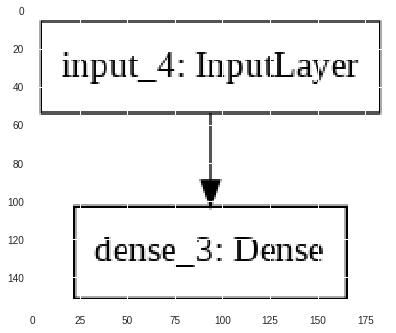

In [0]:
# Import the plotting function
from keras.utils import plot_model
import matplotlib.pyplot as plt

# Summarize the model
model.summary()

# Plot the model
plot_model(model, to_file='model.png')

# Display the image
data = plt.imread('model.png')
plt.imshow(data)
plt.show()

In [0]:
"""
Now that the model is compiled, you are ready to fit it to some data!

In this exercise, you'll use a dataset of scores from US College Basketball tournament games. 
Each row of the dataset has the team ids: team_1 and team_2, as integers. 
It also has the seed difference between the teams (seeds are assigned by the tournament committee 
and represent a ranking of how strong the teams are) and the score difference of the game 
(e.g. if team_1 wins by 5 points, the score difference is 5).

To fit the model, you provide a matrix of X variables (in this case one column: the seed difference) 
and a matrix of Y variables (in this case one column: the score difference).

"""

In [0]:
games_tourney.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


In [0]:
# Input layer
input_tensor = Input(shape=(1,))

# Create a dense layer
output_layer = Dense(1)

# Connect the dense layer to the input_tensor
output_tensor = output_layer(input_tensor)

# Build the model
from keras.models import Model
model = Model(input_tensor, output_tensor)

predictor = games_tourney['seed_diff']
target = games_tourney['score_diff']

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Now fit the model
model.fit(predictor, target,
          epochs=1,
          batch_size=128,
          validation_split=0.10,
          verbose=True)

Train on 3810 samples, validate on 424 samples
Epoch 1/1
3810/3810 [==============================] - 2s 530us/step - loss: 9.4464 - val_loss: 9.1192


In [0]:
"""
Shared layers allow a model to use the same weight matrix for multiple steps. 
In this exercise, you will build a "team strength" layer that represents each team by a single number. 
You will use this number for both teams in the model. 
The model will learn a number for each team that works well both when the team is team_1 and when the team is team_2 in the input data.

The embedding layer is a lot like a dictionary, but your model learns the values for each key.

"""

In [0]:
# Imports
from keras.layers import Embedding
from numpy import unique

# Count the unique number of teams
n_teams = unique(games_season['team_1']).shape[0]

# Create an embedding layer
team_lookup = Embedding(input_dim=n_teams,
                        output_dim=1,
                        input_length=1,
                        name='Team-Strength')

In [0]:
"""
The team strength lookup has three components: an input, an embedding layer, and a flatten layer that creates the output.

If you wrap these three layers in a model with an input and output, you can re-use that stack of three layers at multiple places.

The model will be reusable, so you can use it in two places in your final model.

"""

In [0]:
# Imports
from keras.layers import Input, Embedding, Flatten
from keras.models import Model

# Create an input layer for the team ID
teamid_in = Input(shape=(1,))

# Lookup the input in the team strength embedding layer
strength_lookup = team_lookup(teamid_in)

# Flatten the output
strength_lookup_flat = Flatten()(strength_lookup)

# Combine the operations into a single, re-usable model
team_strength_model = Model(teamid_in, strength_lookup_flat, name='Team-Strength-Model')

In [0]:
"""
In this exercise, you will define two input layers for the two teams in your model. 
This allows you to specify later in the model how the data from each team will be used differently.
"""

In [0]:
# Load the input layer from keras.layers
from keras.layers import Input

# Input layer for team 1
team_in_1 = Input(shape=(1,), name='Team-1-In')

# Separate input layer for team 2
team_in_2 = Input(shape=(1,), name='Team-2-In')

In [0]:
"""
Now that you have a team strength model and an input layer for each team, 
you can lookup the team inputs in the shared team strength model. 
The two inputs will share the same weights.

In this dataset, you have 10,888 unique teams. 
You want to learn a strength rating for each team, such that if any pair of teams plays each other, 
you can predict the score, even if those two teams have never played before. 
Furthermore, you want the strength rating to be the same, regardless of whether the team is the home team or the away team.

To achieve this, you use a shared layer, defined by the re-usable model (team_strength_model()) you built

"""

In [0]:
# Lookup team 1 in the team strength model
team_1_strength = team_strength_model(team_in_1)

# Lookup team 2 in the team strength model
team_2_strength = team_strength_model(team_in_2)

In [0]:
"""
Output layer using shared layer
Now that you've looked up how "strong" each team is, subtract the team strengths to determine which team is expected to win the game.

This is a bit like the seeds that the tournament committee uses, which are also a measure of team strength. 
But rather than using seed differences to predict score differences, you'll use the difference of your own team strength model to predict score differences.

The subtract layer will combine the weights from the two layers by subtracting them.

"""

In [0]:
# Import the Subtract layer from keras
from keras.layers import Subtract

# Create a subtract layer using the inputs from the previous exercise
score_diff = Subtract()([team_1_strength, team_2_strength])

In [0]:
"""
Model using two inputs and one output
Now that you have your two inputs (team id 1 and team id 2) and output (score difference), 
you can wrap them up in a model so you can use it later for fitting to data and evaluating on new data.

"""

In [0]:
# Imports
from keras.layers import Subtract
from keras.models import Model

# Subtraction layer from previous exercise
score_diff = Subtract()([team_1_strength, team_2_strength])

# Create the model
model = Model([team_in_1, team_in_2], score_diff)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [0]:
"""
Now that you've defined a complete team strength model, you can fit it to the basketball data! 
Since your model has two inputs now, you need to pass the input data as a list.
"""

In [0]:
# Get the team_1 column from the regular season data
input_1 = games_season['team_1']

# Get the team_2 column from the regular season data
input_2 = games_season['team_2']

# Fit the model to input 1 and 2, using score diff as a target
model.fit([input_1, input_2],
          games_season['score_diff'],
          epochs=1,
          batch_size=2048,
          validation_split=0.10,
          verbose=True)

Train on 280960 samples, validate on 31218 samples
Epoch 1/1
280960/280960 [==============================] - 1s 2us/step - loss: 12.1203 - val_loss: 11.8381


In [0]:
"""
Now our model has learned a strength rating for every team.
"""

In [0]:
"""

The model you fit to the regular season data (model) in the previous exercise and the tournament dataset (games_tourney) are available in your workspace.

In this exercise, you will evaluate the model on this new dataset. 
This evaluation will tell you how well you can predict the tournament games, 
based on a model trained with the regular season data. 
This is interesting because many teams play each other in the tournament that did not play in the regular season, 
so this is a very good check that your model is not overfitting.

"""

In [0]:
# Get team_1 from the tournament data
input_1 = games_tourney['team_1']

# Get team_2 from the tournament data
input_2 = games_tourney['team_2']

# Evaluate the model using these inputs
model.evaluate([input_1, input_2], games_tourney['score_diff'])

4234/4234 [==============================] - 0s 42us/step


11.681744142585506

In [0]:
"""

Make an input layer for home vs. away
Now you will make an improvement to the model you used in the previous chapter for regular season games. 
You know there is a well-documented home-team advantage in basketball, so you will add a new input to your model to capture this effect.

This model will have three inputs: team_id_1, team_id_2, and home. The team IDs will be integers that you look up in your team 
strength model from the previous chapter, and home will be a binary variable, 1 if team_1 is playing at home, 0 if they are not.
"""

In [0]:
from keras.layers import Concatenate

# Create an Input for each team
team_in_1 = Input(shape=(1,), name='Team-1-In')
team_in_2 = Input(shape=(1,), name='Team-2-In')

# Create an input for home vs away
home_in = Input(shape=(1,), name='Home-In')

# Lookup the team inputs in the team strength model
team_1_strength = team_strength_model(team_in_1)
team_2_strength = team_strength_model(team_in_2)

# Combine the team strengths with the home input using a Concatenate layer, then add a Dense layer
out = Concatenate()([team_1_strength, team_2_strength, home_in])
out = Dense(1)(out)

In [0]:
"""
Now that you've input and output layers for the 3-input model, wrap them up in a Keras model class,
and then compile the model, so you can fit it to data and use it to make predictions on new data.

"""

In [0]:
# Make a Model
model = Model([team_in_1, team_in_2, home_in], out)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [0]:
"""
Now that you've defined a new model, fit it to the regular season basketball data.

Use the model you fit in the previous exercise (which was trained on the regular season data) 
and evaluate the model on data for tournament games (games_tourney)

"""

In [32]:
# Fit the model to the games_season dataset
model.fit([games_season['team_1'], games_season['team_2'], games_season['home']],
          games_season['score_diff'],
          epochs=1,
          verbose=True,
          validation_split=.10,
          batch_size=2048)

# Evaluate the model on the games_tourney dataset
model.evaluate([games_tourney['team_1'], games_tourney['team_2'], games_tourney['home']],
               games_tourney['score_diff'])

Train on 280960 samples, validate on 31218 samples
Epoch 1/1
4234/4234 [==============================] - 0s 44us/step


11.684395866682353

In [0]:
"""
In this exercise, you will take a closer look at the summary of one of your 3-input models available in your workspace as model. 
Note how many layers the model has, how many parameters it has, and how many of those parameters are trainable/non-trainable.
"""

In [33]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Team-1-In (InputLayer)          (None, 1)            0                                            
__________________________________________________________________________________________________
Team-2-In (InputLayer)          (None, 1)            0                                            
__________________________________________________________________________________________________
Team-Strength-Model (Model)     (None, 1)            10888       Team-1-In[0][0]                  
                                                                 Team-2-In[0][0]                  
__________________________________________________________________________________________________
Home-In (InputLayer)            (None, 1)            0                                            
__________

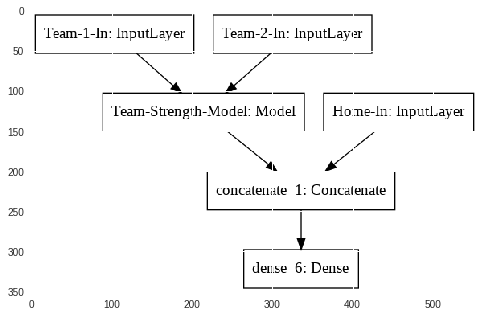

In [34]:
# Imports
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Plot the model
plot_model(model, to_file='model2.png')

# Display the image
data = plt.imread('model2.png')
plt.imshow(data)
plt.show()

In [0]:
"""
take the regular season model from the previous lesson, and predict on the tournament data. 
Add this prediction to the tournament data as a new column.
"""

In [0]:
# Predict
games_tourney['pred'] = model.predict([games_tourney['team_1'], 
                                             games_tourney['team_2'], 
                                             games_tourney['home']])

In [0]:
"""
In this exercise, you will look at a different way to create models with multiple inputs. 
This method only works for purely numeric data, but its a much simpler approach to making multi-variate neural networks.

Now you have three numeric columns in the tournament dataset: 'seed_diff', 'home', and 'pred'. 
In this exercise, you will create a neural network that uses a single input layer to process all three of these numeric inputs.

This model should have a single output to predict the tournament game score difference.
"""

In [0]:
# Create an input layer with 3 columns
input_tensor = Input((3,))

# Pass it to a Dense layer with 1 unit
output_tensor = Dense(1)(input_tensor)

# Create a model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [0]:
# Fit the model
model.fit(games_tourney_train[['home', 'seed_diff', 'pred']],
          games_tourney_train['score_diff'],
          epochs=1,
          verbose=True)

In [0]:
# Evaluate the model on the games_tourney_test dataset
model.evaluate(games_tourney_test[['home', 'seed_diff', 'prediction']], 
               games_tourney_test['score_diff'])

In [0]:
"""
Simple two-output model
In this exercise, you will use the tournament data to build one model that makes two predictions: 
the scores of both teams in a given game. Your inputs will be the seed difference of the two teams, 
as well as the predicted score difference from the model you built.

The output from your model will be the predicted score for team 1 as well as team 2. 
This is called "multiple target regression": one model making more than one prediction

"""

In [0]:
# Define the input
input_tensor = Input(shape=(2,))

# Define the output
output_tensor = Dense(2)(input_tensor)

# Create a model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')

In [0]:
"""
Now that you've defined your 2-output model, fit it to the tournament data. 
I've split the data into games_tourney_train and games_tourney_test, so use the training set to fit for now.

This model will use the pre-tournament seeds, as well as your pre-tournament predictions from the regular season model you built previously
"""

In [0]:
model.fit(games_tourney_train[['seed_diff', 'pred']],
  		  games_tourney_train[['score_1', 'score_2']],
  		  verbose=True,
          epochs=100,
  		  batch_size=16384)

In [0]:
"""
Now that you've fit your model, let's take a look at it. You can use the .get_weights() method to inspect your model's weights.

The input layer will have 4 weights: 2 for each input times 2 for each output.

The output layer will have 2 weights, one for each output.

"""

In [38]:
# Print the model's weights
print(model.get_weights())

# Print the column means of the training data
#print(games_tourney_train.mean())

[array([[0.12850654, 1.174138  ],
       [0.98777187, 0.3873558 ]], dtype=float32), array([0., 0.], dtype=float32)]


In [0]:
model.evaluate(games_tourney_test[['seed_diff', 'pred']],
               games_tourney_test[['score_1', 'score_2']])

In [0]:
"""

Classification and regression in one model: This kind of model is only possible with a neural network.
Now you will create a different kind of 2-output model. This time, you will predict the score difference, 
instead of both team's scores and then you will predict the probability that team 1 won the game. 
This is a pretty cool model: it is going to do both classification and regression!

In this model, turn off the bias, or intercept for each layer. 
Your inputs (seed difference and predicted score difference) have a mean of very close to zero, and 
your outputs both have means that are close to zero, so your model shouldn't need the bias term to fit the data well.

"""

In [0]:
# Create an input layer with 2 columns
input_tensor = Input(shape=(2,))

# Create the first output
output_tensor_1 = Dense(1, activation='linear', use_bias=False)(input_tensor)

# Create the second output (use the first output as input here)
output_tensor_2 = Dense(1, activation='sigmoid', use_bias=False)(output_tensor_1)

# Create a model with 2 outputs
model = Model(input_tensor, [output_tensor_1, output_tensor_2])

In [0]:
"""
Now that you have a model with 2 outputs, compile it with 2 loss functions: mean absolute error (MAE) for 'score_diff' 
and binary cross-entropy (also known as logloss) for 'won'. 
Then fit the model with 'seed_diff' and 'pred' as inputs. For outputs, predict 'score_diff' and 'won'.

This model can use the scores of the games to make sure that close games (small score diff) have lower win probabilities than blowouts (large score diff).

The regression problem is easier than the classification problem because MAE punishes the model less for a loss due to random chance. 
For example, if score_diff is -1 and won is 0, that means team_1 had some bad luck and lost by a single free throw. 
The data for the easy problem helps the model find a solution to the hard problem.
"""

In [40]:
# Import the Adam optimizer
from keras.optimizers import Adam

# Compile the model with 2 losses and the Adam optimzer with a higher learning rate
model.compile(loss=['mean_absolute_error', 'binary_crossentropy'], optimizer=Adam(.01))

# Fit the model to the tournament training data, with 2 inputs and 2 outputs
model.fit(games_tourney_train[['seed_diff', 'pred']],
          [games_tourney_train[['score_diff']], games_tourney_train[['won']]],
          epochs=10,
          verbose=True,
          batch_size=16384)

NameError: ignored

In [0]:
"""
Now you should take a look at the weights for this model. In particular, note the last weight of the model. 
This weight converts the predicted score difference to a predicted win probability. 
If you multiply the predicted score difference by the last weight of the model and then apply the sigmoid function, you get the win probability of the game.
"""

In [41]:
# Import the sigmoid function from scipy
from scipy.special import expit as sigmoid

# Weight from the model
weight = 0.14

# Print the approximate win probability of a predicted close game
print(sigmoid(1 * weight))

# Print the approximate win probability of a predicted blowout game
print(sigmoid(10 * weight))

0.5349429451582145
0.8021838885585818


In [0]:
"""
So sigmoid(1 * 0.14) is 0.53, which represents a pretty close game and sigmoid(10 * 0.14) is 0.80, which represents a pretty likely win. 
In other words, if the model predicts a win of 1 point, it is less sure of the win than if it predicts 10 points. Who says neural networks are black boxes?
"""

In [0]:
"""
Now that you've fit your model and inspected its weights to make sure they make sense, 
evaluate your model on the tournament test set to see how well it does on new data.

Note that in this case, Keras will return 3 numbers: the first number will be the sum of both the loss functions, 
and then the next 2 numbers will be the loss functions you used when defining the model.
"""

In [0]:
# Evaluate the model on new data
model.evaluate(games_tourney_test[['seed_diff', 'pred']],
               [games_tourney_test[['score_diff']], games_tourney_test[['won']]])